In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
%matplotlib inline

import os
import warnings                   # To ignore any warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler, MinMaxScaler   #standard scaler

# Evaluation metrics
from sklearn.metrics import confusion_matrix  #evaluation metrics
from sklearn.metrics import classification_report

#MODEL BUILDING
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

#parameter improving
from sklearn.model_selection import GridSearchCV

import pickle

# **Data Exploration**

**Data Exploration** is the process of analyzing and understanding the dataset before applying machine learning models. It helps in identifying patterns, detecting anomalies, and preparing the data for modeling.

---

### **Stages of Data Exploration**

1. **Reading the Data:**  
    - Import the dataset and load it into a **DataFrame**.  
    - Check the **shape**, **data types**, and **basic info**.  
    - Display the first few rows to verify the data.  

2. **Variable Identification:**  
    - Categorize variables into:  
        - **Continuous variables** (e.g., `age_in_days`, `Income`)  
        - **Categorical variables** (e.g., `sourcing_channel`, `residence_area_type`)  
    - Identify **target and independent variables**.

3. **Missing Value Treatment:**  
    - Identify missing values using:  
        - `isnull()` or `info()` in pandas.  
    - Handle missing values by:  
        - **Imputation Strategies:**  
            - **Continuous variables:** Mean/Median imputation.  
            - **Categorical variables:** Mode imputation or label "Unknown".  
        - **Advanced Techniques:**  
            - KNN or Regression imputation.  

4. **Univariate Analysis:**  
    - Analyze each variable **independently**.  
    - Use:  
        - **Descriptive statistics:** Mean, median, mode, standard deviation.  
        - **Visualizations:** Histograms, boxplots, and density plots.  
    - Identify:  
        - **Distribution type** (symmetric, skewed).  
        - **Presence of outliers**.

5. **Outlier Detection and Treatment:**  
    - Detect **outliers** using:  
        - **Boxplots**  
        - **IQR method**  
        - **Z-score method**  
    - Handle outliers by:  
        - **Capping or flooring** extreme values.  
        - **Removing or transforming** them.  

6. **Bivariate Analysis:**  
    - Analyze the **relationship between two variables**:  
        - **Continuous vs Continuous:** Correlation plot, scatter plot.  
        - **Continuous vs Categorical:** Boxplot, violin plot.  
        - **Categorical vs Categorical:** Stacked bar plot or heatmap.  

7. **Variable Transformation:**  
    - **Transform skewed variables** using:  
        - **Logarithmic or square root transformation**.  
    - **Scale the data** using:  
        - **Standardization or normalization**.  
    - **Encode categorical variables** using:  
        - **One-hot encoding** or **label encoding**.

---

- **Missing value treatment** is performed before univariate analysis to avoid distortion in statistics.  
- **Outlier detection** is done before bivariate analysis to prevent skewed relationships.  
- **Variable transformation** is performed at the end to ensure data is properly prepared.  

---

# Reading the Data

In [ ]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/Premium analysis/premiums_dataset.csv')

In [ ]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [ ]:
df.shape

(79853, 12)

In [ ]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# **VARIABLE IDENTIFICATION**

In [ ]:
# Print data types for each variable
df.dtypes

,0
id,int64
perc_premium_paid_by_cash_credit,float64
age_in_days,int64
Income,int64
Count_3-6_months_late,float64
Count_6-12_months_late,float64
Count_more_than_12_months_late,float64
application_underwriting_score,float64
no_of_premiums_paid,int64
sourcing_channel,object


There are two format of data types:

1. **object**: Object format means variables are categorical.

2. **int64 / float64**: It represents the integer / float variables.

In [ ]:
# Identify categorical and continuous variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the variables
print("Categorical Variables:")
print(categorical_vars)

print("\nContinuous Variables:")
print(continuous_vars)


Categorical Variables:
['sourcing_channel', 'residence_area_type']

Continuous Variables:
['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'target']


In [ ]:
# Print categories for each categorical variable
print("Categories for Categorical Variables:\n")
for col in categorical_vars:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 50)


Categories for Categorical Variables:

sourcing_channel:
['C' 'A' 'B' 'D' 'E']
--------------------------------------------------
residence_area_type:
['Urban' 'Rural']
--------------------------------------------------


# **Missing Value Investigation**


Missing or empty values in a dataset occur due to:
- **Errors in data collection:**  
    - Incomplete or faulty data entry.  
- **Errors during data reading:**  
    - Issues in file handling or formatting.  
- **Intentional non-disclosure:**  
    - Sensitive information (e.g., income) may be intentionally left blank by customers.

---

- Since the dataset contains **`Income`**, there may be cases where:
    - Some customers might **choose not to disclose** their actual income.  
    - This could lead to **missing values** or incorrect entries (e.g., `0` or `NaN`).  

---

### **Impact of Missing Values**
- **Data Quality Issues:**  
    - Missing values can distort **statistical analysis** and **model accuracy**.  
- **Potential Bias:**  
    - If missing values are not handled properly, it can introduce **bias** in the model.
- **Reduced Model Performance:**  
    - Models with missing values may fail or produce inaccurate predictions.

---

### **Handling Missing Values**
1. **Detection:**  
    - Identify missing values using:  
        - `isnull()` or `isna()` in pandas.  
        - `info()` or `describe()` to get an overview of missing values.  

2. **Imputation Strategies:**  
    - **For Continuous Variables:**  
        - **Mean/Median Imputation**: Replace missing values with the mean or median.  
        - **Interpolation**: Use linear or polynomial interpolation.  
    - **For Categorical Variables:**  
        - **Mode Imputation**: Replace missing values with


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [ ]:
df.isna().sum()

,0
id,0
perc_premium_paid_by_cash_credit,0
age_in_days,0
Income,0
Count_3-6_months_late,97
Count_6-12_months_late,97
Count_more_than_12_months_late,97
application_underwriting_score,2974
no_of_premiums_paid,0
sourcing_channel,0


**Key Observations**
1. **Premium Late Count Columns:**  
    - `Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late` have a **small percentage of missing values** (~0.12%).  
    - These can be handled with **mean or median imputation** without major impact on the model.

2. **Underwriting Score:**  
    - `application_underwriting_score` has a **higher percentage of missing values** (~3.72%).  
    - This is a **critical feature** for predicting premium payment behavior.  
    - It might require **more advanced imputation** (e.g., using KNN or regression imputation) or be flagged as "unknown."

---


In [ ]:
# Impute with 0 (Assumption: No late payments)
df['Count_3-6_months_late'].fillna(0, inplace=True)
df['Count_6-12_months_late'].fillna(0, inplace=True)
df['Count_more_than_12_months_late'].fillna(0, inplace=True)

# OR Impute with median
# df['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].median(), inplace=True)
# df['Count_6-12_months_late'].fillna(df['Count_6-12_months_late'].median(), inplace=True)
# df['Count_more_than_12_months_late'].fillna(df['Count_more_than_12_months_late'].median(), inplace=True)

In [ ]:
# Impute with median
df['application_underwriting_score'].fillna(df['application_underwriting_score'].median(), inplace=True)

# OR KNN Imputation (more accurate but complex)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df[['application_underwriting_score']] = imputer.fit_transform(df[['application_underwriting_score']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  float64
 5   Count_6-12_months_late            79853 non-null  float64
 6   Count_more_than_12_months_late    79853 non-null  float64
 7   application_underwriting_score    79853 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [ ]:
df.duplicated().sum()

np.int64(0)

**Key Observations**
 : **No duplicates**

In [ ]:
df.nunique()

,0
id,79853
perc_premium_paid_by_cash_credit,1001
age_in_days,833
Income,24165
Count_3-6_months_late,14
Count_6-12_months_late,17
Count_more_than_12_months_late,10
application_underwriting_score,672
no_of_premiums_paid,57
sourcing_channel,5


# Univariate Analysis

Univariate analysis examines **one variable at a time** to understand its **statistical properties**, **distribution**, and **presence of missing values or outliers**. It helps in identifying patterns, anomalies, and the overall structure of individual features.

---

### **Key Steps for Univariate Analysis**

1. **Statistical Properties**
   - **Central Tendency:**  
     - `Mean`: The average value.  
     - `Median`: The middle value when sorted.  
   - **Dispersion:**  
     - `Standard Deviation (SD)`: Measures the spread of values.  
     - `IQR (Interquartile Range)`: Detects outliers.  
   - **Missing Values:**  
     - Identify and quantify missing values.

2. **Distribution of Variables**
   - Determine if the distribution is:
     - **Symmetric** → Mean ≈ Median  
     - **Right-skewed** → Mean > Median  
     - **Left-skewed** → Mean < Median  
   - Use **histograms** and **density plots** for visualization.

3. **Presence of Missing Values**
   - Identify missing values and their percentage.

4. **Presence of Outliers**
   - Detect outliers using:
     - **Box plots**
     - **IQR method**  
     - **Z-score method**  
   - Outliers are values that significantly deviate from the majority of the data.

---

### **Univariate Analysis for Different Variable Types**

#### **1. Continuous Variables**
- **Tabular Methods:**  
    - Display **mean**, **median**, **standard deviation**, and **missing values**.  
- **Graphical Methods:**  
    - **Histogram/Density Plot:** To visualize distribution.  
    - **Box Plot:** To detect outliers.

#### **2. Categorical Variables**
- **Tabular Methods:**  
    - Display **frequency counts** and **percentage distribution**.  
- **Graphical Methods:**  
    - **Bar Plot:** To visualize the frequency of categories.  
    - **Pie Chart:** To represent the proportion of categories.

---

In [ ]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248369,0.078093,0.059935,99.072606,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691102,0.436251,0.311840,0.726395,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


**Key Observations**
1. **Symmetric Distribution:**
    - The **`id`** and **`age_in_days`** columns have a **mean ≈ median**, indicating a **symmetric distribution**.
2. **Right-Skewed Distribution:**
    - The **`perc_premium_paid_by_cash_credit`** column has:  
        - Mean = `0.3143`  
        - Median = `0.1670`  
        - The difference indicates a **right-skewed distribution**.
    - The **`Income`** column shows extreme skewness with:  
        - Mean = `208,847.2`  
        - Max = `90,262,600` → indicating potential **outliers** or errors.
3. **Presence of Outliers:**
    - **`Count_3-6_months_late`**, **`Count_6-12_months_late`**, and **`Count_more_than_12_months_late`** show **max values** significantly higher than the **75th percentile**, indicating **outliers**.
    - **`Income`** has an extremely large max value, suggesting **outliers or incorrect values**.
4. **Low Variability in Underwriting Score:**
    - The **`application_underwriting_score`** has a **low standard deviation** (`0.74`), meaning the scores are **clustered closely** around the mean.

---


**Quartiles**
**Quartiles** are values that divide the **data distribution** into **four equal parts**. They help in understanding the **spread** and **central tendency** of the data.

---

- **1st Quartile (Q1)** → Represents the **25th percentile** of the data.  
    - It marks the value below which **25% of the data** falls.  
- **2nd Quartile (Q2)** → Represents the **50th percentile**, also known as the **median**.  
    - It divides the data into two equal halves.  
- **3rd Quartile (Q3)** → Represents the **75th percentile** of the data.  
    - It marks the value below which **75% of the data** falls.  
- **Interquartile Range (IQR)** → Difference between **Q3** and **Q1**.  
    - Formula:  IQR = Q3 - Q1
    - IQR helps in detecting **outliers**.

---

**Visualization Insight**
- **Box Plot**: Graphically represents the quartiles, median, and potential outliers.  
- The **whiskers** in the box plot indicate the range of the data, while the **outliers** appear as individual points outside the whiskers.

---

**Key Points**
- **Q1 (25th percentile)** → Lower quartile  
- **Q2 (50th percentile)** → Median  
- **Q3 (75th percentile)** → Upper quartile  
- **IQR** → Spread of the middle 50% of the data  
- **Outliers** → Typically defined as values:  
    - Below \( Q1 - 1.5 \times IQR \)  
    - Above \( Q3 + 1.5 \times IQR \)  

---
**Symmetry in Data Distribution**
- The **mean** and **median** can help determine if a variable’s distribution is **symmetric** or **skewed**:
    - If **mean ≈ median** → The data is **symmetric**.  
    - If **mean > median** → The data is **right-skewed**.  
    - If **mean < median** → The data is **left-skewed**.  

---

**observation from the Dataset**

- For the `id` column:
    - The **mean** ≈ **median**, indicating a **symmetric distribution**.  
- For the `age_in_days` column:
    - The **mean** ≈ **median**, indicating a **symmetric distribution**.  
- For the `perc_premium_paid_by_cash_credit` column:
    - The **mean = 0.314288**  
    - The **median = 0.167000**  
    - The difference between the mean and median indicates a **right-skewed distribution**.

---

**Boxplot**
A **boxplot** is a graphical representation of the **five-number summary** of a variable:
- **Minimum Value** → The smallest value excluding outliers.  
- **1st Quartile (Q1)** → Represents the **25th percentile** of the data.  
- **Median (Q2)** → The **50th percentile**, representing the middle of the data.  
- **3rd Quartile (Q3)** → Represents the **75th percentile** of the data.  
- **Maximum Value** → The largest value excluding outliers.  

---

**Outliers in Boxplot**
- **Outliers** appear as individual points beyond the whiskers in the boxplot.  
- They are unusually **small or large** values in the dataset.  
- Outliers can arise due to:  
    1. **Data Entry Errors:** Mistakes while recording the data.  
    2. **Measurement Errors:** Inaccuracies in measurements.  
    3. **Processing Errors:** Issues during data processing or transformation.  
    4. **Change in Underlying Population:** When the distribution of the population changes significantly over time.

---


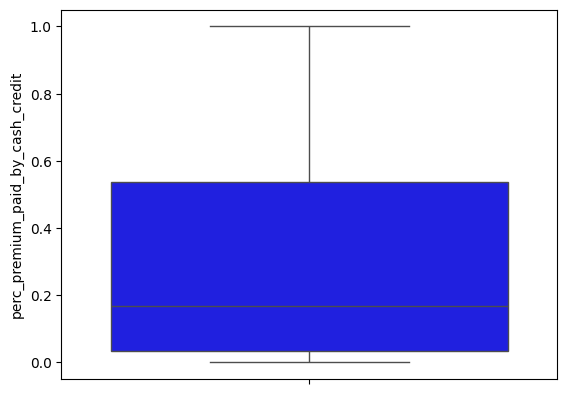

In [ ]:
# Plotting boxplot for 'perc_premium_paid_by_cash_credit' column using the 'seaborn' library:
sns.boxplot(df['perc_premium_paid_by_cash_credit'],color='blue')
plt.show()

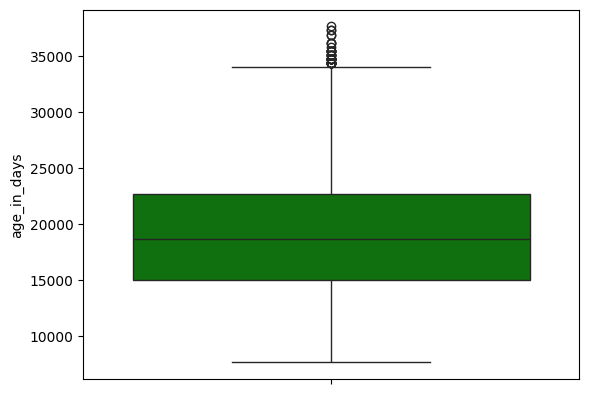

In [ ]:
sns.boxplot(df['age_in_days'],color='green')
plt.show()

**Key Observations from the Age Distribution Plot**

1. **Minimum Age:**  
    - The youngest customer in the dataset is **less than 10,000 days** old.  
    - This is approximately **27 years** old (`10,000 / 365 ≈ 27.4 years`).  

2. **1st Quartile (Q1):**  
    - **25% of the customers** are **younger than 15,000 days**.  
    - This is approximately **41 years** old (`15,000 / 365 ≈ 41.1 years`).  

3. **Median Age (Q2):**  
    - The **median age** is **less than 20,000 days**.  
    - This is approximately **54 years** old (`20,000 / 365 ≈ 54.8 years`).  
    - Since the **median is close to the mean**, the age distribution appears to be approximately **symmetrical**.  

4. **3rd Quartile (Q3):**  
    - **75% of the customers** are **younger than 22,500 days**.  
    - This is approximately **61.6 years** old (`22,500 / 365 ≈ 61.6 years`).  

5. **Maximum Age:**  
    - The **oldest customer** is **more than 35,000 days** old.  
    - This is approximately **95.9 years** old (`35,000 / 365 ≈ 95.9 years`).  

---

- The **age distribution** covers a wide range, from young adults (27 years) to senior citizens (96 years).  
- Most customers fall within the **41 to 62 years** range (between Q1 and Q3).  
- The presence of older customers suggests that the insurance policies cater to a **diverse age group**.  


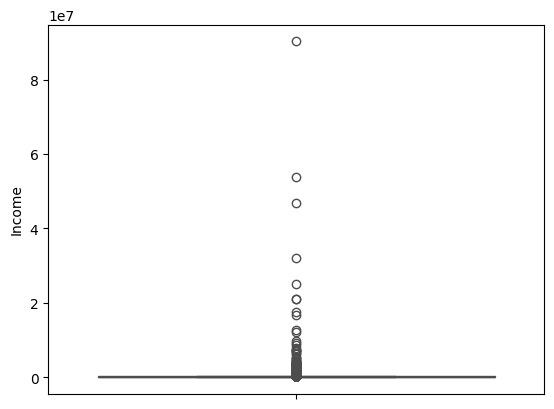

In [ ]:
sns.boxplot(df['Income'],color='yellow')
plt.show()

**Key Observations from the Income Boxplot**

1. **Majority of Customers:**  
    - The **majority of customers** have a monthly income of **less than ₹1 × 10⁷ (1 crore)**.  
    - This is evident from the **upper whisker** of the boxplot, which is below ₹1 crore.  

2. **High-Income Outliers:**  
    - Two **outlier points** between **4 and 6** on the boxplot represent customers with:  
        - **Incomes below ₹5 crores**.  
        - **Incomes above ₹5 crores**.  

3. **Maximum Income:**  
    - The **highest income** in the dataset exceeds **₹8 crores** per month.  
    - This extreme value is represented by a **distant outlier point** on the boxplot.  

---

- The **majority of customers** earn below **₹1 crore** per month.  
- The **high-income outliers** represent a small group of customers earning **between ₹4 crores and ₹8 crores**, making them **exceptionally high earners**.  
- These **outliers could potentially skew the model** and may require **scaling or transformation** during data preprocessing.  


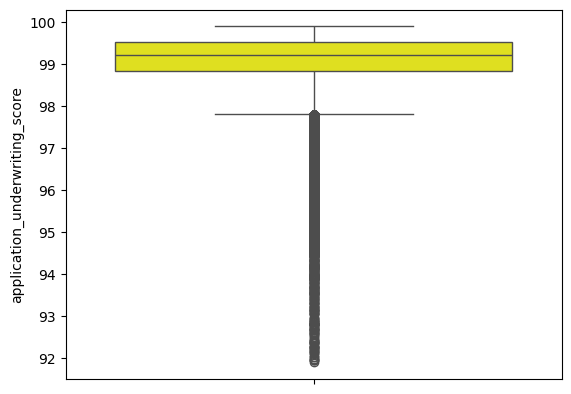

In [ ]:
sns.boxplot(df['application_underwriting_score'],color='yellow')
plt.show()

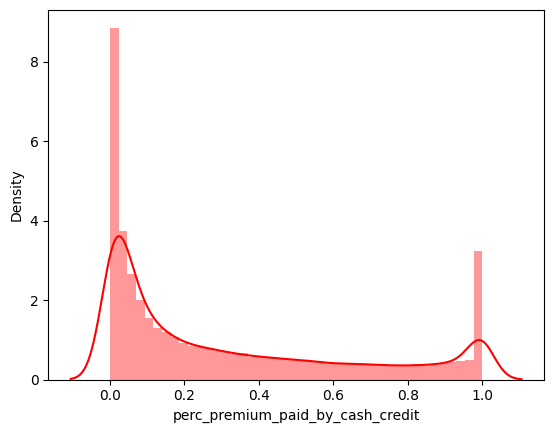

In [ ]:
sns.distplot(df['perc_premium_paid_by_cash_credit'],color='red')
plt.show()

**Key Observations from the Distribution Plot**

1. **Distribution Shape:**  
    - The distribution is **right-skewed**.  
    - However, it also shows a **slight bimodal pattern** with a **small peak at the extreme right**.  
    - This indicates the presence of **two groups** of customers:  
        - One group that pays a **very small percentage** of the premium by cash/credit.  
        - Another group that pays **almost entirely by cash/credit**.  

2. **Mode of the Distribution:**  
    - The **mode** (most frequent value) is near `0`.  
    - This indicates that **most customers** pay **very little** of their premium by cash or credit card.  

3. **Small Peak at the Extreme Right:**  
    - A **small peak** near `1` represents customers who pay **100% of their premium** by cash or credit.  
    - These customers are the **minority** in the dataset.  

---

- The **majority of customers** pay a **small percentage** of their premium by cash/credit (near `0`).  
- A **small group** of customers pays **100% of their premium** by cash/credit.  
- The **bimodal distribution** suggests two distinct customer behaviors:
    - **Low cash/credit payers** (majority).  
    - **Full cash/credit payers** (minority).  


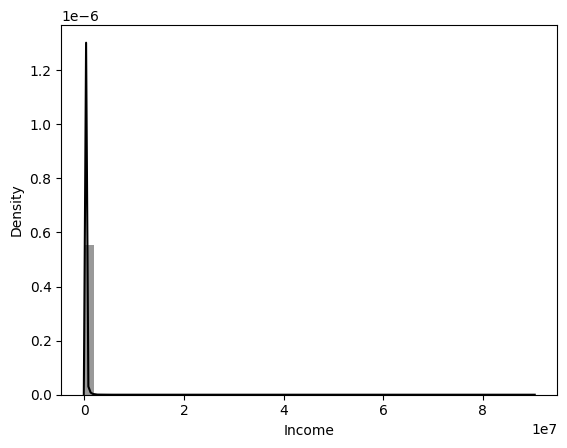

In [ ]:
# Checking the 'income' distribution:
sns.distplot(df['Income'],color='black')
plt.show()

**Key Observations from the Distribution Plot**

1. **Distribution Shape:**  
    - The distribution of `Income` is **extremely right-skewed**.  
    - Most customers have a **lower income**, while a **small group of customers** has **exceptionally high income**, creating a **long right tail**.  

2. **Implication of Right-Skewness:**  
    - The **skewness** can **distort the model's performance** by giving more influence to the high-income outliers.  
    - It can also lead to **non-linear relationships** between `Income` and the target variable.  

3. **Solution – Variable Transformation:**  
    - To make the distribution **more symmetrical**, apply a **variable transformation**.  
    - Common transformations include:  
        -  **Log Transformation:**  
        -  **Square Root Transformation:**  
        -  **Box-Cox Transformation** (for advanced analysis):  
---

- The `Income` variable is **highly right-skewed**, which could negatively impact the model’s performance.  
- Applying **log transformation** or **Box-Cox transformation** will:  
    - **Reduce skewness**.  
    - **Stabilize variance**.  
    - Improve the **model's interpretability and accuracy**.  


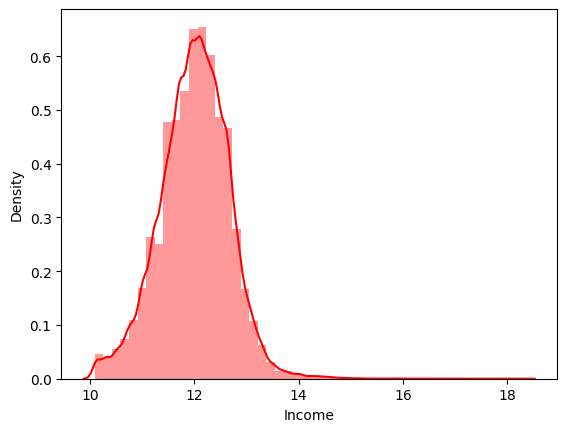

In [ ]:
sns.distplot(np.log(df["Income"]),color='red')
plt.show()

In [ ]:
np.log(df['Income']).mode()

,Income
0,11.919257


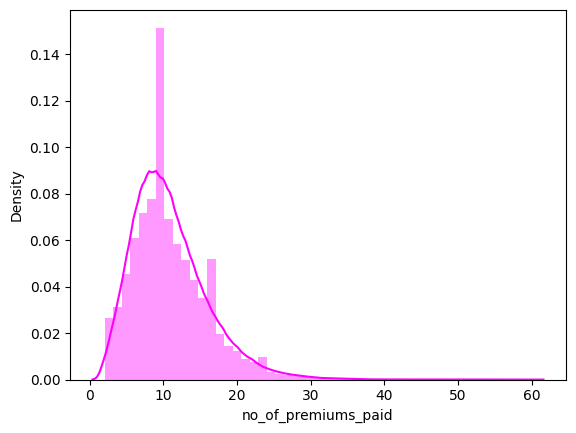

In [ ]:
sns.distplot(df['no_of_premiums_paid'],color='magenta')
plt.show()

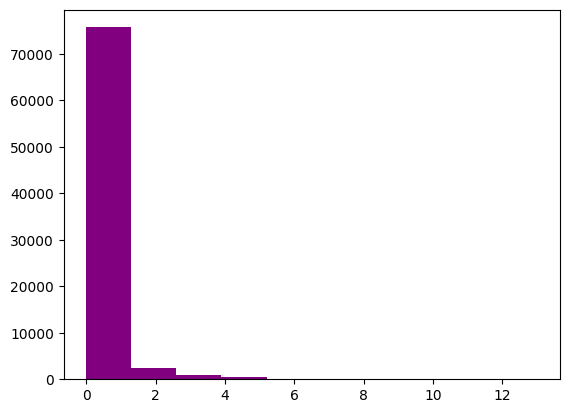

In [ ]:
plt.hist(df['Count_3-6_months_late'],histtype='stepfilled',label=str,color='purple',bins=10)
plt.show()

In [ ]:
df['Count_3-6_months_late'].value_counts()

,count
Count_3-6_months_late,
0.0,66898
1.0,8826
2.0,2519
3.0,954
4.0,374
5.0,168
6.0,68
7.0,23
8.0,15


In [ ]:
df['Count_6-12_months_late'].value_counts()

,count
Count_6-12_months_late,
0.0,75928
1.0,2680
2.0,693
3.0,317
4.0,130
5.0,46
6.0,26
7.0,11
8.0,5


In [ ]:
df['Count_more_than_12_months_late'].value_counts()

,count
Count_more_than_12_months_late,
0.0,76135
1.0,2996
2.0,498
3.0,151
4.0,48
5.0,13
6.0,6
7.0,3
8.0,2


**Key Observations**
1. **Majority of Customers:**  
    - **76,135** customers (**95.4%**) have **0 late premiums** beyond **12 months**.  
    - This indicates that the **majority of policyholders** pay their premiums on time or have delays of less than **12 months**.  

2. **Late Payment Distribution:**  
    - **2,996** customers (**3.75%**) have been **1 month late** beyond the **12-month threshold**.  
    - **498 customers** (**0.62%**) have been **2 months late**.  
    - **151 customers** (**0.19%**) have been **3 months late**.  
    - **Only a few customers** have more than **3 months late payments** beyond **12 months**.  
    - There is **one extreme case** with **11 months late** payment.  

3. **Skewed Distribution:**  
    - The distribution is **highly skewed** towards `0` (no late payments beyond 12 months).  
    - Very few customers exhibit **multiple late payments** beyond 12 months.  

---

- The **majority of customers** have **no late payments** beyond 12 months.  
- Only a **small fraction of customers** have late payments extending beyond **1-3 months**.  
- The presence of **rare extreme cases** (up to **11 months late**) indicates potential **outliers** that may need special attention or handling during model building.  


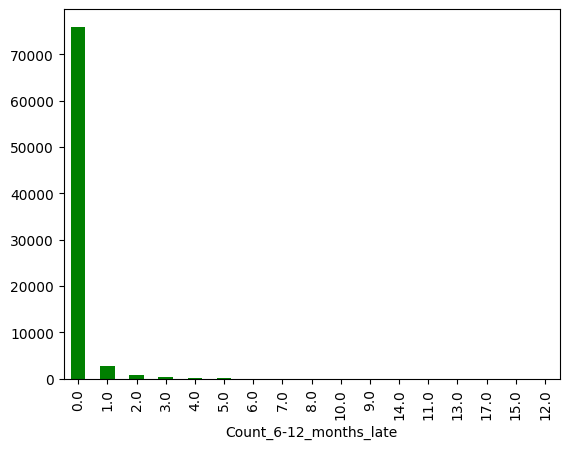

In [ ]:
df['Count_6-12_months_late'].value_counts().plot.bar(color='green')
plt.show()

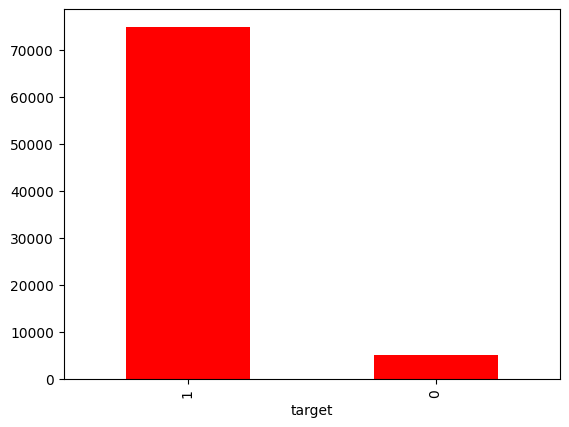

In [ ]:
df['target'].value_counts().plot.bar(color='red')
plt.show()

In [ ]:
df['target'].value_counts()

,count
target,
1,74855
0,4998


**Distribution of `target` Variable**
**Key Observations**
**Class Imbalance:**  
    - The dataset is **highly imbalanced** towards `target = 1`.  
    - **Class distribution ratio:**  
        - `1` (paid on time): **93.7%**  
        - `0` (not paid on time): **6.3%**  
    - This imbalance could lead to:  
        - The model **favoring the majority class**.  
        - Poor prediction performance on the **minority class** (non-payers).  

---

**Handling Class Imbalance**
- **Resampling Techniques:**  
    - **Oversampling the minority class** → Use **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic samples of the minority class.  
    - **Undersampling the majority class** → Randomly reduce the samples from the majority class.  
- **Class-weight adjustment:**  
    - Assign higher weights to the **minority class** during model training to balance the influence of both classes.  
- **Evaluation with appropriate metrics:**  
    - Use **precision, recall, F1-score**, and **AUC-ROC** rather than accuracy, as accuracy can be misleading in imbalanced datasets.  


# Outlier Treatment For Income

In [ ]:
# Get the 10th and 95th percentiles
lower_bound = 0.1
upper_bound = 0.95
result = df['Income'].quantile([lower_bound, upper_bound])

# Remove outliers
df_no_outliers = df[(df['Income'] >= result[lower_bound]) &
                       (df['Income'] <= result[upper_bound])]

print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)


Original shape: (79853, 12)
After outlier removal: (67885, 12)


<Axes: xlabel='Income'>

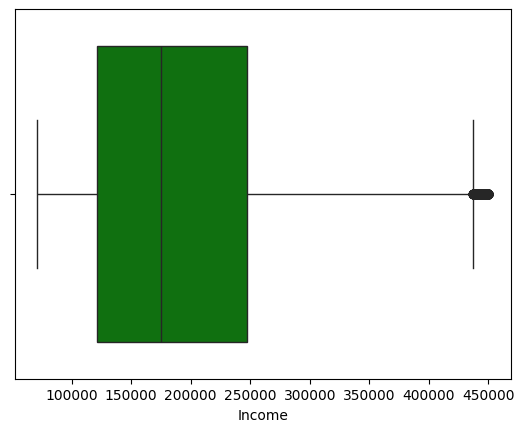

In [ ]:
df=df_no_outliers
sns.boxplot(x=df['Income'], color='green')

- The **whiskers** represent the minimum and maximum values within the central **85% of the data** (between the 10th and 95th percentiles).
- The **green box** covers the **interquartile range (IQR)**, which contains the middle 50% of the data.
- The **black dot** on the right-hand side is a mild outlier but still within the valid percentile range (around ₹4.5 lakh).
- The data distribution now appears **more compact** and realistic.

---

- The **median (central line)** is slightly shifted to the left, indicating that the distribution is still slightly **right-skewed**, but less extreme.
- The **whiskers are shorter**, representing a **reduced spread**, making the dataset more reliable.
- The income range is now approximately between **₹71,200 and ₹4.5 lakh**, representing a more realistic and consistent range.
- The **outliers beyond ₹4.5 lakh** have been removed, making the data more representative of the general population.

---

In [ ]:
# Creating the total late premium column
df['late_premium'] = (df['Count_3-6_months_late'] + df['Count_6-12_months_late'] + df['Count_more_than_12_months_late'])

<Axes: xlabel='late_premium', ylabel='count'>

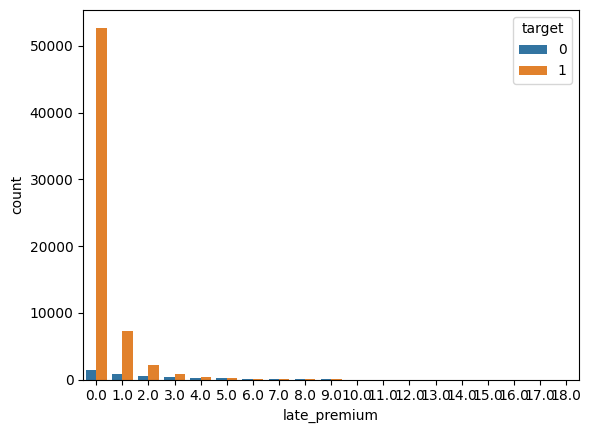

In [ ]:
sns.countplot(x = 'late_premium', data = df, hue = 'target')

<Axes: xlabel='late_premium'>

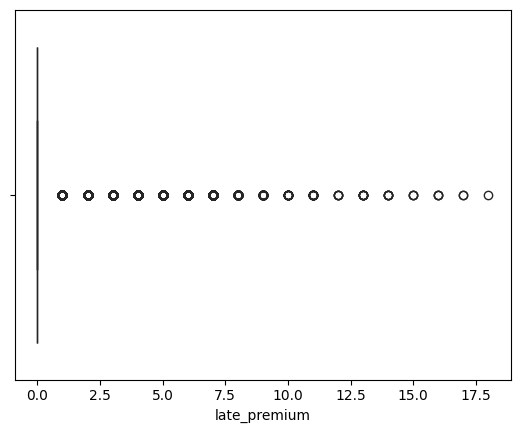

In [ ]:
sns.boxplot(x=df['late_premium'], color='green')

In [ ]:
df['late_premium'].value_counts()

,count
late_premium,
0.0,54208
1.0,8042
2.0,2706
3.0,1267
4.0,685
5.0,395
6.0,246
7.0,145
8.0,82


In [ ]:
# Grouping late premiums greater than or equal to 10 into '10+'
df['late_premium'] = df['late_premium'].apply(lambda x: '10+' if x >= 10 else str(int(x)))

In [ ]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000,67885.000000
mean,57120.310967,0.307069,18933.328497,192104.755837,0.250320,0.076851,0.060072,99.100197,11.015379,0.939604
std,32941.219825,0.328863,5059.044747,86939.496326,0.697007,0.436904,0.312211,0.628613,5.064125,0.238221
min,2.000000,0.000000,7670.000000,71200.000000,0.000000,0.000000,0.000000,91.960000,2.000000,0.000000
25%,28588.000000,0.034000,14980.000000,120850.000000,0.000000,0.000000,0.000000,98.840000,7.000000,1.000000
50%,57150.000000,0.163000,18626.000000,175020.000000,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85615.000000,0.521000,22635.000000,247530.000000,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114076.000000,1.000000,37240.000000,450050.000000,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


# Continuous-Continuous Analysis

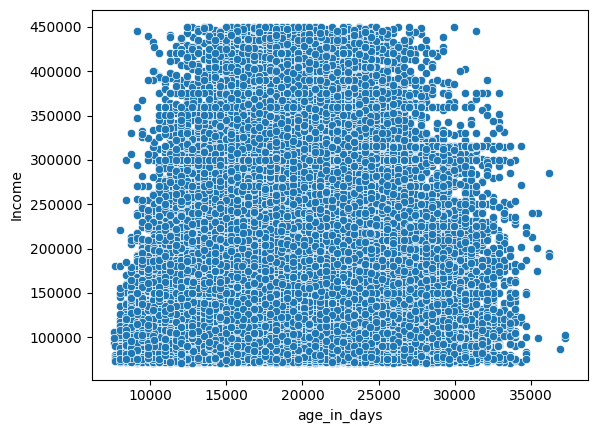

In [ ]:
sns.scatterplot(x='age_in_days', y='Income', data=df)
plt.show()


- The points appear **scattered randomly** across the plot, indicating **no clear linear correlation** between `age_in_days` and `Income`.
- Regardless of age, customers have **similar income ranges**.
- The customers' **age ranges from ~7,670 days (~21 years)** to **37,240 days (~102 years)**.
- The **distribution appears uniform**, indicating a good spread of customers across different age groups.
- The majority of the points are concentrated between: **₹1 lakh** and **₹2.5 lakhs**
- This indicates that **most customers** have moderate income levels, regardless of their age.

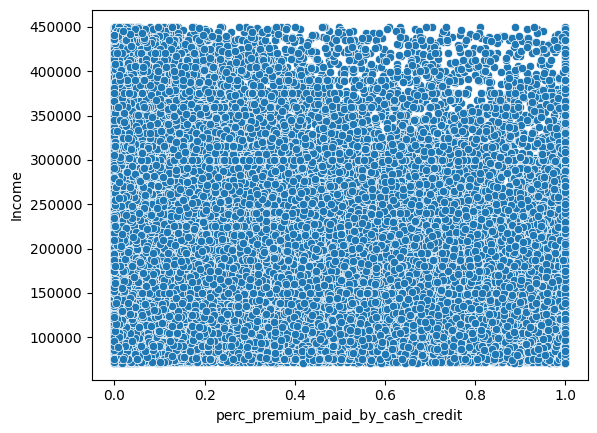

In [ ]:
sns.scatterplot(x='perc_premium_paid_by_cash_credit', y='Income', data=df)
plt.show()

- The points are **evenly scattered** across the entire range, indicating **no clear correlation** between `perc_premium_paid_by_cash_credit` and `Income`.
- Customers with **low, moderate, and high income** have a similar range of premium payment percentages.
- The scatterplot shows a **dense concentration of points at `0%`**, indicating that **many customers pay no premium** via cash or credit card.
- This suggests that the majority of payments might be made via **other payment methods** (e.g., auto-debit, bank transfer).
- The income range is **uniformly spread** across different percentages of premium paid by cash/credit.
- This indicates that **income does not influence** the mode of payment significantly.
- There is a **slight increase in density** near `100%`, indicating that some customers **consistently pay their premiums fully** using cash/credit.

# Categorical-Continuous Analysis

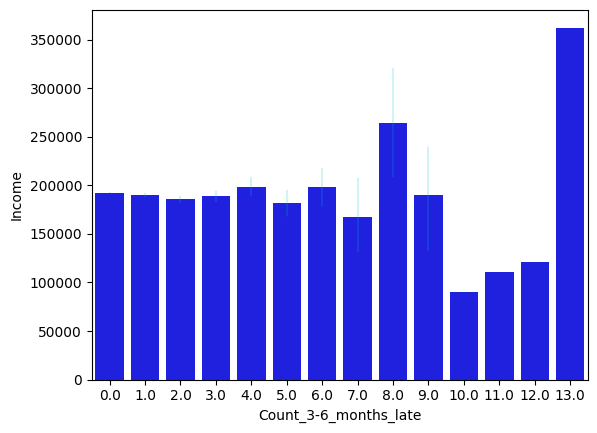

In [ ]:
sns.barplot(x='Count_3-6_months_late', y='Income', data=df, color='b', errcolor='c', errwidth=0.26)
plt.show()

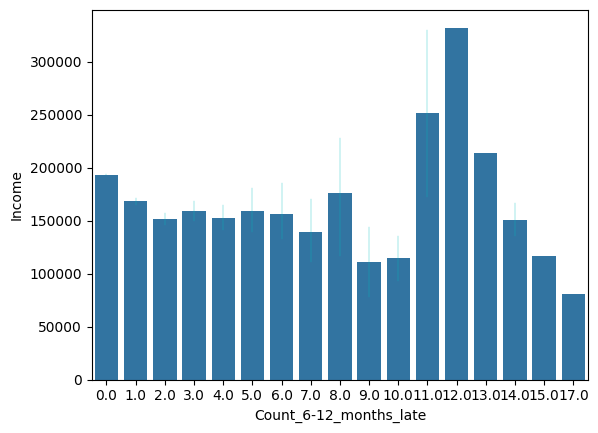

In [ ]:
sns.barplot(x='Count_6-12_months_late', y='Income', data=df, errcolor='c', errwidth=0.26)
plt.show()

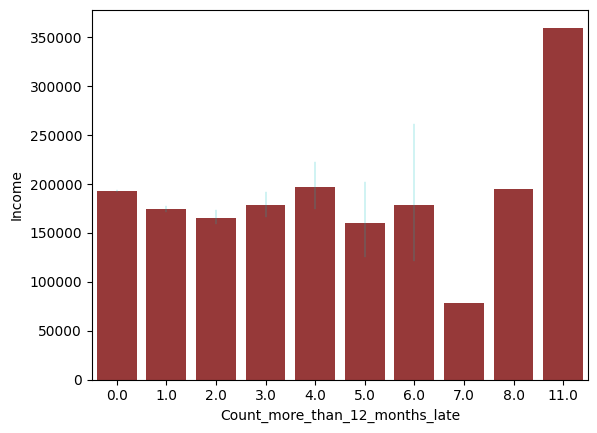

In [ ]:
sns.barplot(x='Count_more_than_12_months_late', y='Income', data=df, color='brown', errcolor='c', errwidth=0.26)
plt.show()

One thing is clear from above 3 plots though that the customers who earn more than Rs 4 lakh a month have been paying their premiums on time. So the insurance company should not be worried atleast about all the rich customers as they seem to be sticking around with the company in near future.

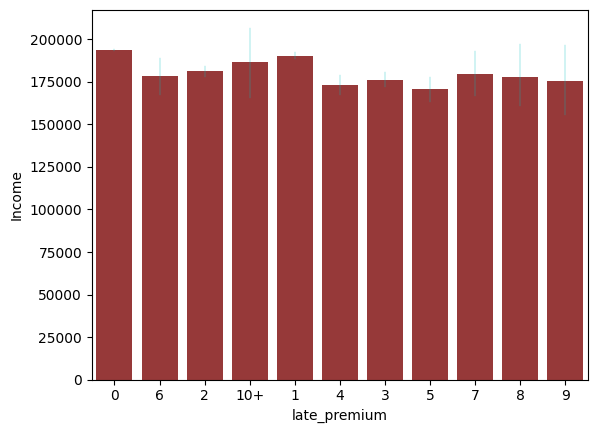

In [ ]:
sns.barplot(x='late_premium', y='Income', data=df, color='brown', errcolor='c', errwidth=0.26)
plt.show()

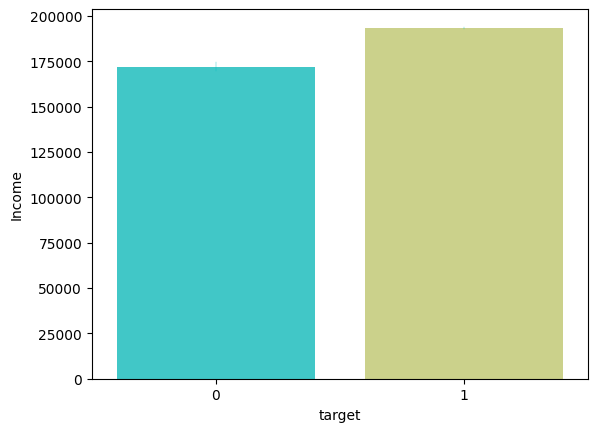

In [ ]:
sns.barplot(x='target', y='Income', data=df, palette='rainbow', errcolor='c', errwidth=0.26)
plt.show()

This shows that the customers who earn under Rs 1,80,000 a month are the ones the insurance company should be worried about. As they are the ones who did not pay their premiums on time.

# Categorical-Categorical Analysis

In [ ]:
pd.crosstab(df['target'],df['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1636,2464
1,25277,38508


This **two-way table** is displaying the following:

1. The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
2. The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

In [ ]:
pd.crosstab(df['residence_area_type'],df['sourcing_channel'])

sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,14171,5685,4214,2614,229
Urban,21645,8745,6323,3966,293


In [ ]:
df['sourcing_channel'].value_counts()/len(df['sourcing_channel'])

,count
sourcing_channel,
A,0.527598
B,0.212565
C,0.155218
D,0.096929
E,0.007689


So 52% of total customers prefer channel A, 20.67% customers prefer channel B, 15% customers prefer channel C, and so on. Clearly A is the most preferred channel whereas E is the least preferred channel among the customers.

In [ ]:
df['residence_area_type'].value_counts()

,count
residence_area_type,
Urban,40972
Rural,26913


In [ ]:
df['residence_area_type'].value_counts() / len(df['residence_area_type'])

,count
residence_area_type,
Urban,0.60355
Rural,0.39645


So 60.35% of all customers are urban & 39.64% of them are rural.

In [ ]:
pd.crosstab(df['no_of_premiums_paid'],df['residence_area_type'])

residence_area_type,Rural,Urban
no_of_premiums_paid,,
2,149,308
3,446,694
4,863,1227
5,1326,1969
6,1833,2826
7,2229,3407
8,2564,3618
9,2487,3744
10,2364,3635


In [ ]:
pd.crosstab(df['residence_area_type'],df['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
residence_area_type,,,,,,,,,,,,,,
Rural,22620,2867,856,350,127,50,24,7,8,2,1,0,1,0
Urban,34255,4567,1304,491,207,91,37,13,4,1,0,1,0,1


In [ ]:
pd.crosstab(df['residence_area_type'],df['Count_6-12_months_late'])

Count_6-12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0
residence_area_type,,,,,,,,,,,,,,,,,
Rural,25601,905,223,104,50,12,9,4,2,0,1,0,1,0,1,0,0
Urban,39029,1306,355,157,61,30,14,6,3,2,3,2,0,1,1,1,1


In [ ]:
pd.crosstab(df['residence_area_type'],df['Count_more_than_12_months_late'])

Count_more_than_12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
residence_area_type,,,,,,,,,,
Rural,25624,1030,189,52,13,4,1,0,0,0
Urban,39110,1489,247,81,30,8,4,1,1,1


In [ ]:
pd.crosstab(df['residence_area_type'],df['late_premium'])

late_premium,0,1,10+,2,3,4,5,6,7,8,9
residence_area_type,,,,,,,,,,,
Rural,21548,3122,22,1055,524,279,165,95,49,30,24
Urban,32660,4920,40,1651,743,406,230,151,96,52,23


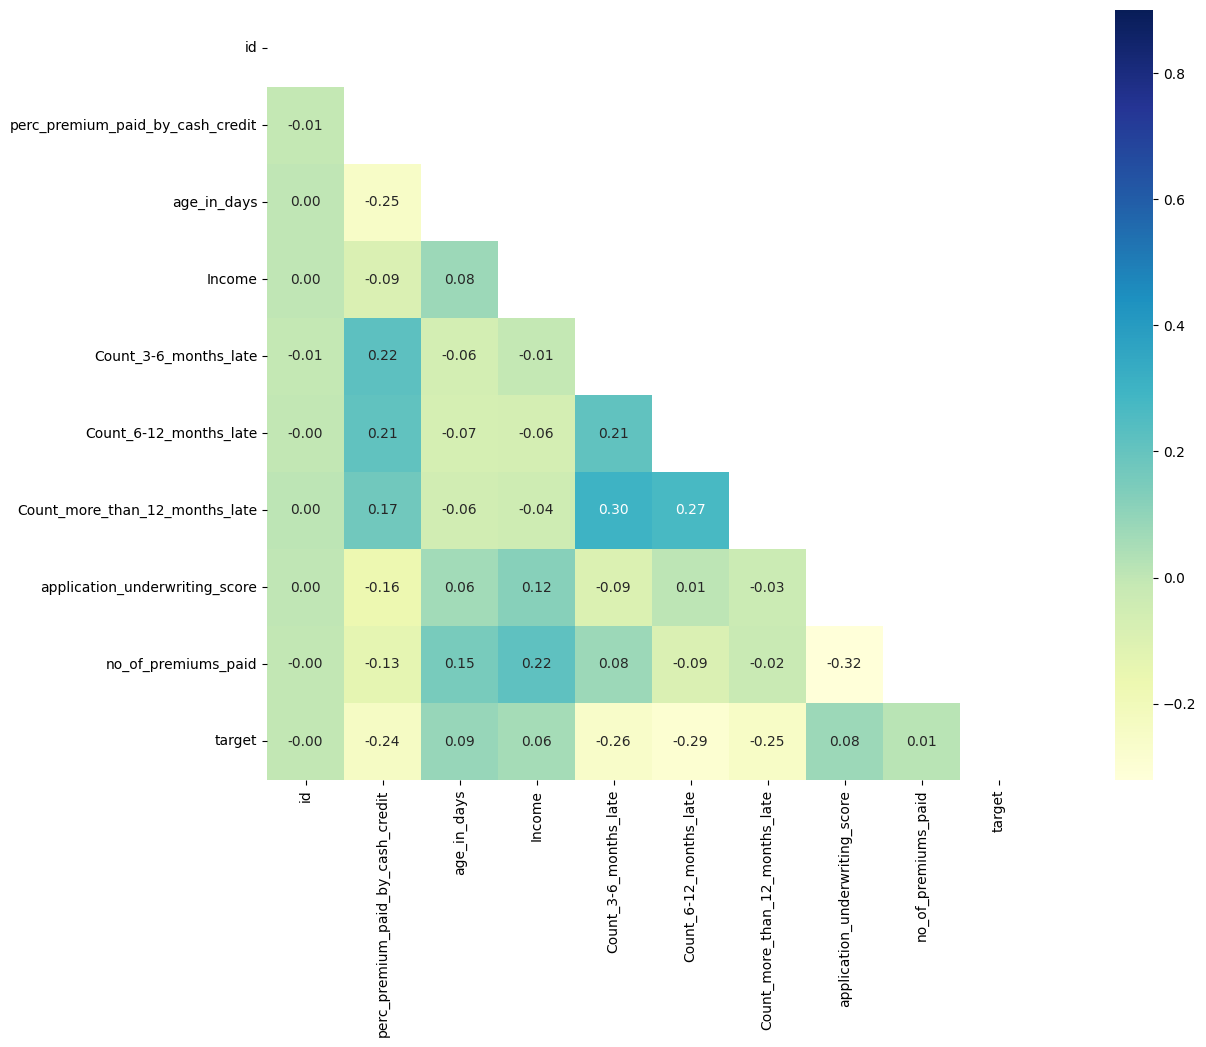

In [ ]:
# Select only numerical columns
num_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr = num_df.corr()

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()


# Variable Transformation

In [ ]:
#--> CONVERTING AGE IN DAYS TO YEARS AND DROPPING PREVIOUS ONE
df['age'] = df['age_in_days']//365
df.drop(['age_in_days'], axis = 1, inplace = True)
df.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,0,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,0,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,6,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,0,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,0,86


In [ ]:
#GROUPING SOURCING CHANNEL
df[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.948654
1,B,0.938184
2,C,0.926734
3,D,0.915653
4,E,0.919540


In [ ]:
#Let's standardize our data by using a standard scaler
scaler = MinMaxScaler()
scaler = scaler.fit(df[['Income']])
xscale = scaler.transform(df[['Income']])
xscale

array([[0.74926752],
       [0.6439224 ],
       [0.034156  ],
       ...,
       [0.54889798],
       [0.61718358],
       [0.55151115]])

In [ ]:
#scaler.mean
print(scaler.scale_)

[2.63956711e-06]


In [ ]:
#ADDING SCALED INCOME
df['scale_income'] = xscale
df.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age,scale_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,0,33,0.749268
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,0,59,0.643922
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,6,48,0.034156
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,0,42,0.473301
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,0,86,0.336492


In [ ]:
#BINNING INCOMECLASS AS WELL OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
df['Incomeclass'] = pd.cut(df['Income'], 5)
df[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(70821.15, 146970.0]",24923
1,"(146970.0, 222740.0]",21103
2,"(222740.0, 298510.0]",11922
3,"(298510.0, 374280.0]",7032
4,"(374280.0, 450050.0]",2905


In [ ]:
# Binning income into 5 classes based on the specified ranges
bins = [70821.15, 146970.0, 222740.0, 298510.0, 374280.0, 450050.0]
labels = [0, 1, 2, 3, 4]
df['Income_class'] = pd.cut(df['Income'], bins=bins, labels=labels)
df[['Income', 'Income_class']].head()


,Income,Income_class
0,355060,3
1,315150,3
2,84140,0
3,250510,2
4,198680,1


In [ ]:
df['Ageclass'] = pd.cut(df['age'], 5)
df[['Ageclass', 'target']].groupby('Ageclass', as_index = False).count()

,Ageclass,target
0,"(20.919, 37.2]",11197
1,"(37.2, 53.4]",27056
2,"(53.4, 69.6]",22065
3,"(69.6, 85.8]",6886
4,"(85.8, 102.0]",681


The Age feature lies between 20 to 102.

In [ ]:
# Dividing 'Age' into proper classes based on the provided ranges
df.loc[df['age'] <= 37.2, 'Age'] = 0
df.loc[(df['age'] > 37.2) & (df['age'] <= 53.4), 'Age'] = 1
df.loc[(df['age'] > 53.4) & (df['age'] <= 69.6), 'Age'] = 2
df.loc[(df['age'] > 69.6) & (df['age'] <= 85.8), 'Age'] = 3
df.loc[(df['age'] > 85.8) & (df['age'] <= 102.0), 'Age'] = 4
df.loc[df['age'] > 102.0, 'Age'] = 5  # For any age beyond 102 years

# Display the first few rows to verify
df.head()


,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age,scale_income,Incomeclass,Income_class,Ageclass,Age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,0,33,0.749268,"(298510.0, 374280.0]",3,"(20.919, 37.2]",0.0
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,0,59,0.643922,"(298510.0, 374280.0]",3,"(53.4, 69.6]",2.0
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,6,48,0.034156,"(70821.15, 146970.0]",0,"(37.2, 53.4]",1.0
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,0,42,0.473301,"(222740.0, 298510.0]",2,"(37.2, 53.4]",1.0
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,0,86,0.336492,"(146970.0, 222740.0]",1,"(85.8, 102.0]",4.0


In [ ]:
#grouping of mean und_score based on the ageclass
df[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
21,99.472222
22,99.569730
23,99.585347
24,99.532424
25,99.542311
...,...
96,99.845000
97,99.267500
99,99.066667


In [ ]:
#binning the number of premium paid
df['Premiumclass'] = pd.cut(df['no_of_premiums_paid'], 5)

In [ ]:
#grouping premiums based on the application_underwriting _scores
df[['Premiumclass', 'application_underwriting_score']].groupby('Premiumclass').count()

,application_underwriting_score
Premiumclass,
"(1.942, 13.6]",50279
"(13.6, 25.2]",16702
"(25.2, 36.8]",841
"(36.8, 48.4]",46
"(48.4, 60.0]",17


In [ ]:
print(df['application_underwriting_score'].mean())
print(df['application_underwriting_score'].std())

99.10019739264933
0.6286128523400283


In [ ]:
print(df[df['sourcing_channel'] == 'A']['application_underwriting_score'].std())

0.6471713719651089


In [ ]:
#grouping the sourcing channel
df[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.948654
1,B,0.938184
2,C,0.926734
3,D,0.915653
4,E,0.919540


In [ ]:
df[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.142583
1,B,99.080539
2,C,99.008942
3,D,99.058581
4,E,99.102088


In [ ]:
df[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.099079
1,Urban,99.100932


setting the value of underwriting score based on the sourcing channel.

In [ ]:
mask1 = df['application_underwriting_score'].isnull()
for source in ['A', 'B', 'C', 'D', 'E']:
  mask2 = (df['sourcing_channel'] == source)
  source_mean = df[df['sourcing_channel'] == source]['application_underwriting_score'].mean()
  df.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean

In [ ]:
#--> tranforming Area Type and sourcing channel to numerical values using dictionary
df['residence_area_type'] = df['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
df['sourcing_channel'] = df['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [ ]:
df['application_underwriting_score'] = df['application_underwriting_score']/100

In [ ]:
#converting percentage premiums
df['Premiumclass'] = pd.cut(df['perc_premium_paid_by_cash_credit'], 4)
df[['Premiumclass', 'target']].groupby('Premiumclass').mean()

,target
Premiumclass,
"(-0.001, 0.25]",0.976693
"(0.25, 0.5]",0.947043
"(0.5, 0.75]",0.899631
"(0.75, 1.0]",0.820814


In [ ]:
df.loc[ df['perc_premium_paid_by_cash_credit'] <= 0.25, 'perc_premium_paid_by_cash_credit'] = 0
df.loc[(df['perc_premium_paid_by_cash_credit'] > 0.25) & (df['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
df.loc[(df['perc_premium_paid_by_cash_credit'] > 0.5) & (df['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
df.loc[ df['perc_premium_paid_by_cash_credit'] > 0.75, 'perc_premium_paid_by_cash_credit'] = 3


In [ ]:
# Replace '10+' with 11
df['late_premium'] = df['late_premium'].replace('10+', 11).astype(int)

# Convert the other column to int
df['perc_premium_paid_by_cash_credit'] = df['perc_premium_paid_by_cash_credit'].astype(int)


DataFrame.astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to convert any suitable existing column to categorical type.

In [ ]:
df

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age,scale_income,Incomeclass,Income_class,Ageclass,Age,Premiumclass
0,110936,3,355060,0.0,0.0,0.0,0.9902,13,2,1,1,0,33,0.749268,"(298510.0, 374280.0]",3,"(20.919, 37.2]",0.0,"(0.25, 0.5]"
1,41492,0,315150,0.0,0.0,0.0,0.9989,21,0,1,1,0,59,0.643922,"(298510.0, 374280.0]",3,"(53.4, 69.6]",2.0,"(-0.001, 0.25]"
2,31300,3,84140,2.0,3.0,1.0,0.9869,7,2,0,0,6,48,0.034156,"(70821.15, 146970.0]",0,"(37.2, 53.4]",1.0,"(0.75, 1.0]"
3,19415,0,250510,0.0,0.0,0.0,0.9957,9,0,1,1,0,42,0.473301,"(222740.0, 298510.0]",2,"(37.2, 53.4]",1.0,"(-0.001, 0.25]"
4,99379,0,198680,0.0,0.0,0.0,0.9987,12,1,1,1,0,86,0.336492,"(146970.0, 222740.0]",1,"(85.8, 102.0]",4.0,"(-0.001, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79847,91081,0,301540,0.0,0.0,0.0,0.9989,4,0,0,1,0,50,0.607998,"(298510.0, 374280.0]",3,"(37.2, 53.4]",1.0,"(-0.001, 0.25]"
79848,48057,3,224550,1.0,0.0,0.0,0.9870,19,1,1,1,1,64,0.404778,"(222740.0, 298510.0]",2,"(53.4, 69.6]",2.0,"(0.25, 0.5]"
79849,59012,3,279150,1.0,0.0,1.0,0.9942,12,0,0,1,2,53,0.548898,"(222740.0, 298510.0]",2,"(37.2, 53.4]",1.0,"(0.5, 0.75]"
79850,77050,0,305020,0.0,0.0,0.0,0.9889,12,0,0,1,0,64,0.617184,"(298510.0, 374280.0]",3,"(53.4, 69.6]",2.0,"(-0.001, 0.25]"


In [ ]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target', 'late_premium', 'age', 'scale_income', 'Incomeclass',
       'Income_class', 'Ageclass', 'Age', 'Premiumclass'],
      dtype='object')

# MODEL BUILDING

In [ ]:
features_to_drop = [
    'id','Income','Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late','age' ,'scale_income','Incomeclass','Ageclass', 'Premiumclass'
]

# Drop from dataframe
df = df.drop(features_to_drop, axis=1)

In [ ]:
df

,perc_premium_paid_by_cash_credit,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,Income_class,Age
0,3,0.9902,13,2,1,1,0,3,0.0
1,0,0.9989,21,0,1,1,0,3,2.0
2,3,0.9869,7,2,0,0,6,0,1.0
3,0,0.9957,9,0,1,1,0,2,1.0
4,0,0.9987,12,1,1,1,0,1,4.0
...,...,...,...,...,...,...,...,...,...
79847,0,0.9989,4,0,0,1,0,3,1.0
79848,3,0.9870,19,1,1,1,1,2,2.0
79849,3,0.9942,12,0,0,1,2,2,1.0
79850,0,0.9889,12,0,0,1,0,3,2.0


In [ ]:
# Define features and target
features = [
    'perc_premium_paid_by_cash_credit',
    'Income_class',
    'Age',
    'late_premium',
    'application_underwriting_score',
    'no_of_premiums_paid',
    'sourcing_channel',
    'residence_area_type'
]

target = 'target'

# Separate X and y
X = df[features]
y = df[target]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67885 entries, 0 to 79852
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   perc_premium_paid_by_cash_credit  67885 non-null  int64   
 1   application_underwriting_score    67885 non-null  float64 
 2   no_of_premiums_paid               67885 non-null  int64   
 3   sourcing_channel                  67885 non-null  int64   
 4   residence_area_type               67885 non-null  int64   
 5   target                            67885 non-null  int64   
 6   late_premium                      67885 non-null  int64   
 7   Income_class                      67885 non-null  category
 8   Age                               67885 non-null  float64 
dtypes: category(1), float64(2), int64(6)
memory usage: 4.7 MB


In [ ]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the sizes
print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

Train size: (40731, 8), Validation size: (13577, 8), Test size: (13577, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training set, and transform the validation & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display shape to confirm
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape


((40731, 8), (13577, 8), (13577, 8))

# logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_model.fit(X_train_scaled, y_train)
# Predict on training and test data
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification Report
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, log_model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])

# Print Results
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nTrain Confusion Matrix:\n", train_cm)
print("\nTest Confusion Matrix:\n", test_cm)
print("\nTrain Classification Report:\n", train_report)
print("\nTest Classification Report:\n", test_report)
print("\nTrain ROC AUC Score:", train_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)

Train Accuracy: 0.9401684220863715
Test Accuracy: 0.9432127863298225

Train Confusion Matrix:
 [[  257  2203]
 [  234 38037]]

Test Confusion Matrix:
 [[  106   714]
 [   57 12700]]

Train Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.10      0.17      2460
           1       0.95      0.99      0.97     38271

    accuracy                           0.94     40731
   macro avg       0.73      0.55      0.57     40731
weighted avg       0.92      0.94      0.92     40731


Test Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.13      0.22       820
           1       0.95      1.00      0.97     12757

    accuracy                           0.94     13577
   macro avg       0.80      0.56      0.59     13577
weighted avg       0.93      0.94      0.92     13577


Train ROC AUC Score: 0.8171887085532297
Test ROC AUC Score: 0.8231873653297951


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train_scaled, y_train)

# Predictions on all sets
y_train_pred = best_dt_model.predict(X_train_scaled)
y_val_pred = best_dt_model.predict(X_val_scaled)
y_test_pred = best_dt_model.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification Report
train_report = classification_report(y_train, y_train_pred)
val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, best_dt_model.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_dt_model.predict_proba(X_val_scaled)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test_scaled)[:, 1])

# Print Results
print("\nTrain Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

print("\nTrain Confusion Matrix:\n", train_cm)
print("\nValidation Confusion Matrix:\n", val_cm)
print("\nTest Confusion Matrix:\n", test_cm)

print("\nTrain Classification Report:\n", train_report)
print("\nValidation Classification Report:\n", val_report)
print("\nTest Classification Report:\n", test_report)

print("\nTrain ROC AUC Score:", train_roc_auc)
print("Validation ROC AUC Score:", val_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Train Accuracy: 0.9415923989099212
Validation Accuracy: 0.9401193194372837
Test Accuracy: 0.9414450909626574

Train Confusion Matrix:
 [[  384  2076]
 [  303 37968]]

Validation Confusion Matrix:
 [[  107   713]
 [  100 12657]]

Test Confusion Matrix:
 [[  122   698]
 [   97 12660]]

Train Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.16      0.24      2460
           1       0.95      0.99      0.97     38271

    accuracy                           0.94     40731
   macro avg       0.75      0.57      0.61     40731
weighted avg       0.92      0.94      0.93     40731


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.13      0.21       820
           1       0.95      0.99      0.97  

# K-Nearest Neighbor

In [ ]:
# Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define the Parameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN Model
knn_model = KNeighborsClassifier()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the Model
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Model with Best Parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_scaled, y_train)

# Predictions on All Sets
y_train_pred = best_knn_model.predict(X_train_scaled)
y_val_pred = best_knn_model.predict(X_val_scaled)
y_test_pred = best_knn_model.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification Report
train_report = classification_report(y_train, y_train_pred)
val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, best_knn_model.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_knn_model.predict_proba(X_val_scaled)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_knn_model.predict_proba(X_test_scaled)[:, 1])

# Print Results
print("\nTrain Accuracy:", train_acc)
print("valation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

print("\nTrain Confusion Matrix:\n", train_cm)
print("\nvalation Confusion Matrix:\n", val_cm)
print("\nTest Confusion Matrix:\n", test_cm)

print("\nTrain Classification Report:\n", train_report)
print("\nvalation Classification Report:\n", val_report)
print("\nTest Classification Report:\n", test_report)

print("\nTrain ROC AUC Score:", train_roc_auc)
print("valation ROC AUC Score:", val_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Train Accuracy: 0.943482850899806
valation Accuracy: 0.9398247035427562
Test Accuracy: 0.9390881638064373

Train Confusion Matrix:
 [[  366  2094]
 [  208 38063]]

valation Confusion Matrix:
 [[   96   724]
 [   93 12664]]

Test Confusion Matrix:
 [[   88   732]
 [   95 12662]]

Train Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.15      0.24      2460
           1       0.95      0.99      0.97     38271

    accuracy                           0.94     40731
   macro avg       0.79      0.57      0.61     40731
weighted avg       0.93      0.94      0.93     40731


valation Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.12      0.19       820
           1       0.95      0.99      0.97     12757

    accuracy       

# Random Forest

In [ ]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define the Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the Model
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Model with Best Parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Predictions on All Sets
y_train_pred = best_rf_model.predict(X_train_scaled)
y_val_pred = best_rf_model.predict(X_val_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification Report
train_report = classification_report(y_train, y_train_pred)
val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, best_rf_model.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_rf_model.predict_proba(X_val_scaled)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])

# Print Results
print("\nTrain Accuracy:", train_acc)
print("valation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

print("\nTrain Confusion Matrix:\n", train_cm)
print("\nvalation Confusion Matrix:\n", val_cm)
print("\nTest Confusion Matrix:\n", test_cm)

print("\nTrain Classification Report:\n", train_report)
print("\nvalation Classification Report:\n", val_report)
print("\nTest Classification Report:\n", test_report)

print("\nTrain ROC AUC Score:", train_roc_auc)
print("valation ROC AUC Score:", val_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)


NameError: name 'X_train_scaled' is not defined

In [ ]:
!pip install cuml cuml-cu11 cupy-cuda11 imbalanced-learn


['Collecting cuml',
 '  Downloading cuml-0.6.1.post1.tar.gz (1.1 kB)',
 '  Preparing metadata (setup.py) ... \x1b[?25l\x1b[?25hdone',
 'Collecting cuml-cu11',
 '  Downloading cuml_cu11-25.2.1.tar.gz (2.5 kB)',
 '  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 '\x1bERROR: Could not find a version that satisfies the requirement cupy-cuda11 (from versions: none)\x1b\x1b',
 '\x1b\x1bERROR: No matching distribution found for cupy-cuda11\x1b\x1b',
 '\x1b']

In [ ]:
# Import Libraries
import logging
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Configure Logging
logging.basicConfig(
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# Start timer
start_time = time.time()

logging.info("Applying SMOTE to handle class imbalance...")
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
logging.info(f"SMOTE applied. Resampled dataset size: {X_train_resampled.shape}")

# Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid Search with 5-Fold Cross-Validation
logging.info("Starting Grid Search with 5-Fold Cross-Validation...")
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2
)

# Fit the Model on SMOTE-Resampled Data
logging.info("Fitting Grid Search on resampled training data...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
best_params = grid_search.best_params_
logging.info(f"Grid Search completed. Best Parameters: {best_params}")

# Train the Best Model
logging.info("Training the best Random Forest model on the resampled data...")
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on All Sets
logging.info("Generating predictions on training and testing sets...")
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification Report
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, best_rf_model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])

# Log Results
logging.info("Model evaluation completed.")
logging.info(f"\nTrain Accuracy: {train_acc}")
logging.info(f"Test Accuracy: {test_acc}")

logging.info("\nTrain Confusion Matrix:\n" + str(train_cm))
logging.info("\nTest Confusion Matrix:\n" + str(test_cm))

logging.info("\nTrain Classification Report:\n" + str(train_report))
logging.info("\nTest Classification Report:\n" + str(test_report))

logging.info(f"\nTrain ROC AUC Score: {train_roc_auc}")
logging.info(f"Test ROC AUC Score: {test_roc_auc}")

# Timer End
end_time = time.time()
elapsed_time = end_time - start_time
logging.info(f"Total Execution Time: {elapsed_time:.2f} seconds")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
